An Introduction to Transformers and Sequence-to-Sequence Learning for Machine Learning
New deep learning models are introduced at an increasing rate and sometimes it’s hard to keep track of all the novelties. That said, one particular neural network model has proven to be especially effective for common natural language processing tasks. The model is called a Transformer and it makes use of several methods and mechanisms that I’ll introduce here. The papers I refer to in the post offer a more detailed and quantitative description.

Part 1: Sequence to Sequence Learning and Attention
The paper ‘Attention Is All You Need’ describes transformers and what is called a sequence-to-sequence architecture. Sequence-to-Sequence (or Seq2Seq) is a neural net that transforms a given sequence of elements, such as the sequence of words in a sentence, into another sequence. (Well, this might not surprise you considering the name.)

Seq2Seq models are particularly good at translation, where the sequence of words from one language is transformed into a sequence of different words in another language. A popular choice for this type of model is Long-Short-Term-Memory (LSTM)-based models. With sequence-dependent data, the LSTM modules can give meaning to the sequence while remembering (or forgetting) the parts it finds important (or unimportant). Sentences, for example, are sequence-dependent since the order of the words is crucial for understanding the sentence. LSTM are a natural choice for this type of data.

Seq2Seq models consist of an Encoder and a Decoder. The Encoder takes the input sequence and maps it into a higher dimensional space (n-dimensional vector). That abstract vector is fed into the Decoder which turns it into an output sequence. The output sequence can be in another language, symbols, a copy of the input, etc.

Imagine the Encoder and Decoder as human translators who can speak only two languages. Their first language is their mother tongue, which differs between both of them (e.g. German and French) and their second language an imaginary one they have in common. To translate German into French, the Encoder converts the German sentence into the other language it knows, namely the imaginary language. Since the Decoder is able to read that imaginary language, it can now translates from that language into French. Together, the model (consisting of Encoder and Decoder) can translate German into French!

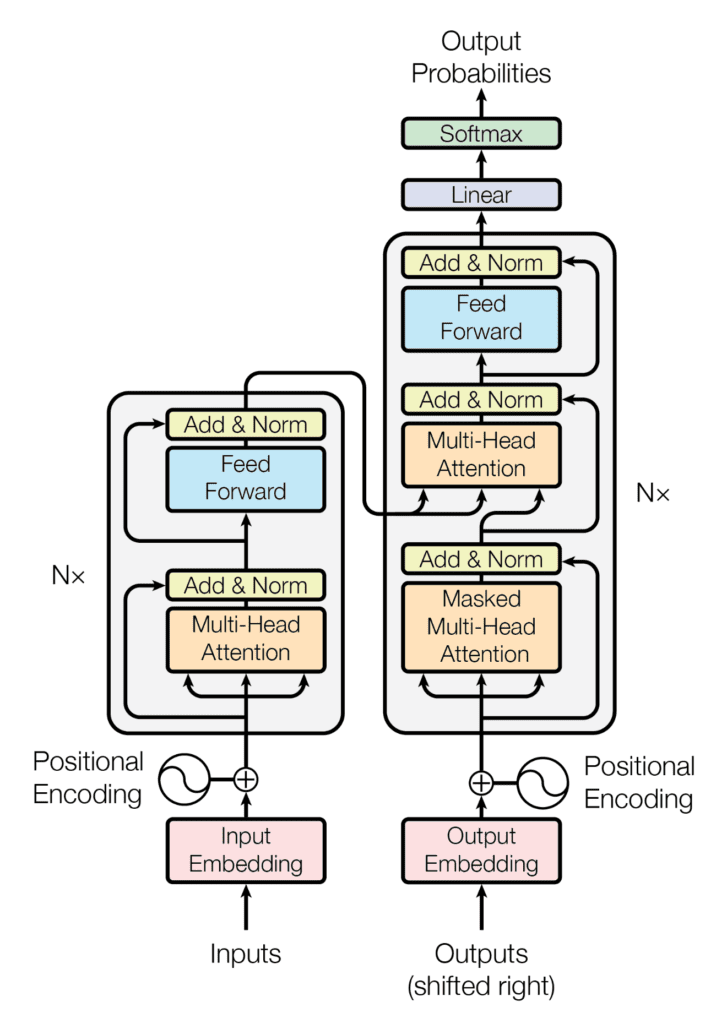

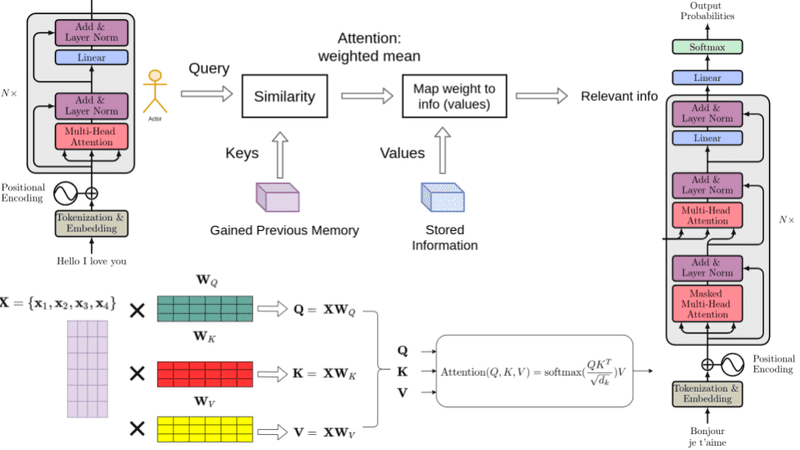

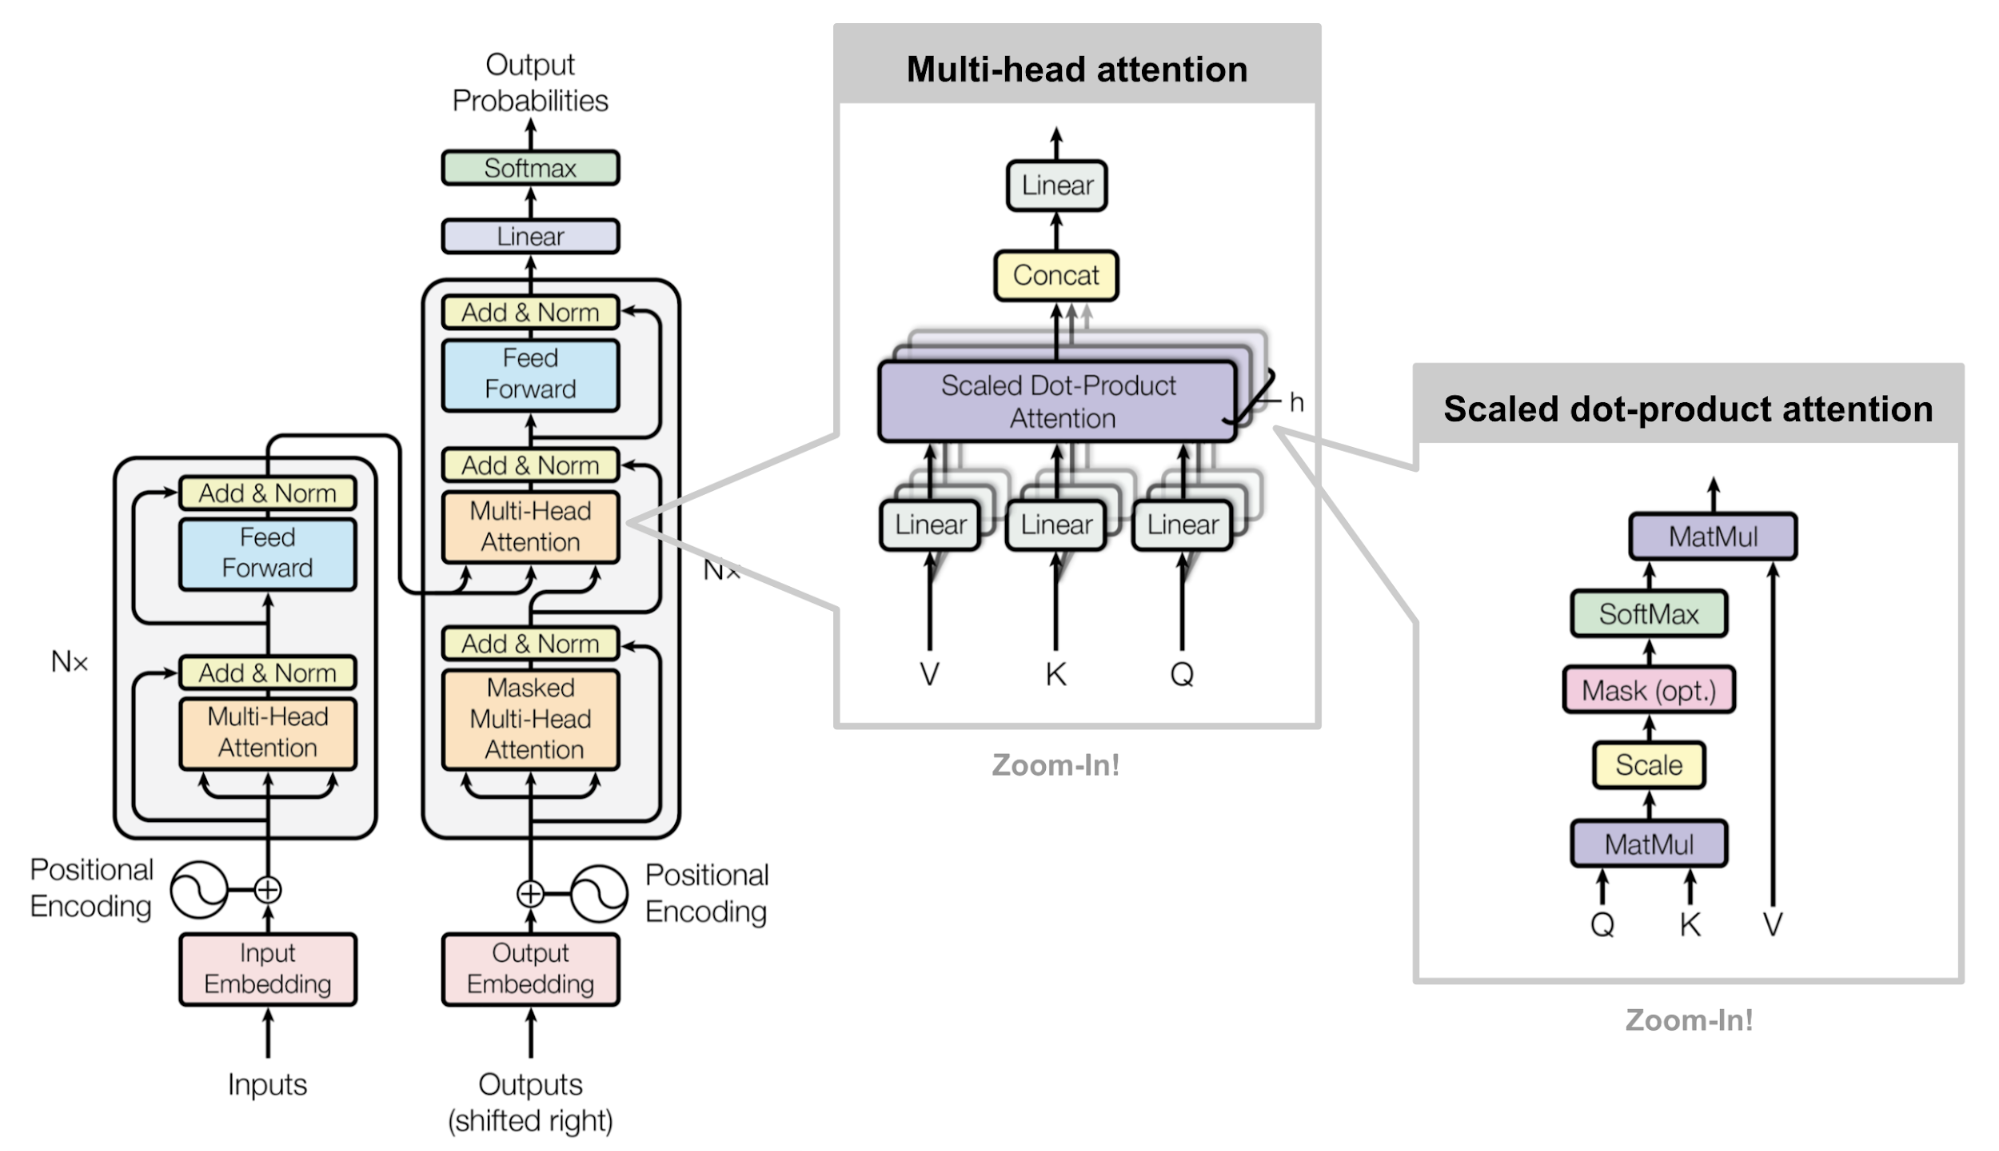

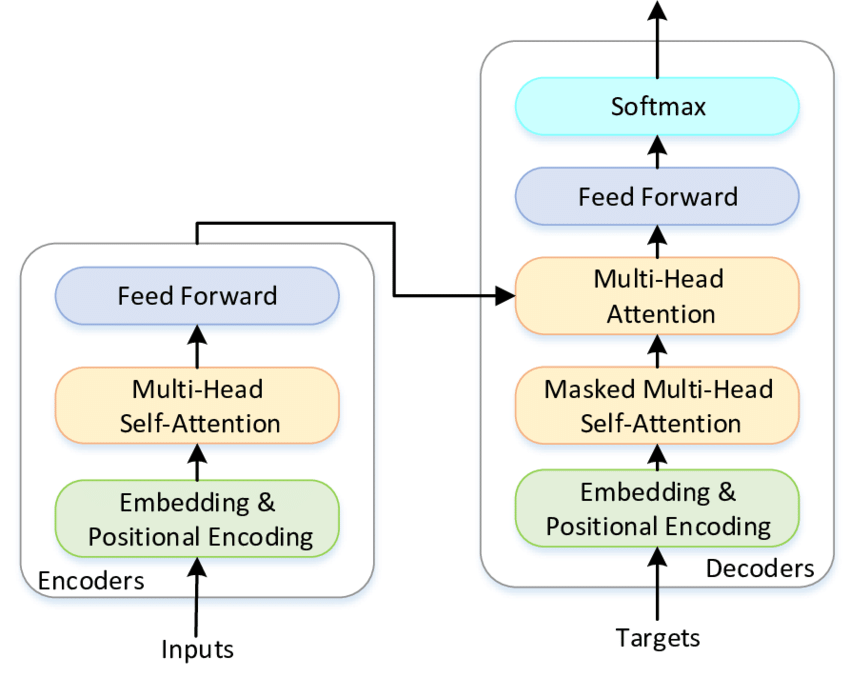

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
text = "Using transformers is easy!"
tokenizer(text)

{'input_ids': [101, 2478, 19081, 2003, 3733, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [ ]:
encoded_input = tokenizer(text, return_tensors="pt")

In [ ]:
from transformers import BertModel
model = BertModel.from_pretrained("bert-base-uncased")
output = model(**encoded_input)

In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")
text = " Using transformers is easy!"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(**encoded_input)
output

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 7, 768), dtype=float32, numpy=
array([[[ 0.02445753,  0.12564287,  0.10623471, ..., -0.06371677,
          0.03443344,  0.38918343],
        [ 0.267794  ,  0.34602773, -0.31899267, ..., -0.12583545,
          0.18990579,  0.22130972],
        [ 1.8174685 , -0.03055565, -0.14973682, ..., -0.48040915,
         -0.12717208,  0.43656954],
        ...,
        [-0.07928275,  0.12823032,  0.15301281, ...,  0.06194745,
         -0.0436546 ,  0.08535916],
        [-0.5068796 , -0.32631528, -0.03486224, ...,  0.67719907,
          0.01611046, -0.04746169],
        [ 0.7605333 ,  0.17230259, -0.09558479, ...,  0.30130094,
         -0.49237737, -0.23796257]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-8.06929052e-01, -2.29552895e-01, -7.80943781e-02,
         5.04974365e-01, -5.45972623e-02,  4.68049012e-03,
         7.96995580e-01,  1.56246185e-01, -2.23272592e-0

In [ ]:
# Access different parts of the output

# 1. Hidden States: Access the hidden states of each layer
hidden_states = output.last_hidden_state
# `hidden_states` is a tensor with shape [batch_size, sequence_length, hidden_size]

# 2. Pooled Output: Access the pooled output (CLS token representation)
pooled_output = output.pooler_output
# `pooled_output` is a tensor with shape [batch_size, hidden_size]

# Print the shapes of these tensors
print("Shape of hidden_states:", hidden_states.shape)
print("Shape of pooled_output:", pooled_output.shape)


Shape of hidden_states: (1, 7, 768)
Shape of pooled_output: (1, 768)


In [ ]:
from transformers import BertTokenizer, TFBertForTokenClassification
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForTokenClassification.from_pretrained("bert-base-uncased")

text = "Apple Inc. was founded in Cupertino, California."
tokens = tokenizer(text, return_tensors='tf')
outputs = model(**tokens)

# Access the predicted token-level labels
predicted_labels = tf.argmax(outputs.logits, axis=2)
predicted_labels


All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<tf.Tensor: shape=(1, 14), dtype=int64, numpy=array([[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [ ]:
#@title SST-2 Binary Classification
from transformers import pipeline

nlp = pipeline("sentiment-analysis")

print(nlp("If you sometimes like to go to the movies to have fun , Wasabi is a good place to start ."),"If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .")
print(nlp("Effective but too-tepid biopic."),"Effective but too-tepid biopic.")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998257756233215}] If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .
[{'label': 'NEGATIVE', 'score': 0.9974064230918884}] Effective but too-tepid biopic.


In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("The man worked as a [MASK].")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.0974755585193634,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'the man worked as a carpenter.'},
 {'score': 0.052383411675691605,
  'token': 15610,
  'token_str': 'waiter',
  'sequence': 'the man worked as a waiter.'},
 {'score': 0.04962712526321411,
  'token': 13362,
  'token_str': 'barber',
  'sequence': 'the man worked as a barber.'},
 {'score': 0.0378861166536808,
  'token': 15893,
  'token_str': 'mechanic',
  'sequence': 'the man worked as a mechanic.'},
 {'score': 0.037680838257074356,
  'token': 18968,
  'token_str': 'salesman',
  'sequence': 'the man worked as a salesman.'}]

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sequence_to_classify = "I am going to france."
candidate_labels = ['travel', 'cooking', 'dancing']
classifier(sequence_to_classify, candidate_labels)

{'sequence': 'I am going to france.',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9866883754730225, 0.007197576109319925, 0.006114045158028603]}